In [2]:
import lsst.daf.persistence as dafPersist
import lsst.afw.table as afwTable
import lsst.afw.geom as afwGeom
import lsst.afw.image as afwImage
import math
import re

import lsst.daf.base as dafBase
from lsst.meas.algorithms.detection import SourceDetectionTask
from lsst.meas.base import SingleFrameMeasurementTask
from lsst.meas.deblender import SourceDeblendTask
from lsst.meas.base import CatalogCalculationTask

%matplotlib inline
import matplotlib
import matplotlib.pylab as plt
import numpy as np

In [3]:
DATADIR="/datadec/cppm/jpreyes/CFHT_Complete/"
butler = dafPersist.Butler(DATADIR+"/detect_testSN_2")

In [28]:
dataId={'patch':"11,11", 'filter':"r", 'tract':0, "date":"2006-04-30"}
dayDiff = butler.get("dayDiff_differenceExp", dataId)

img = dayDiff.getMaskedImage().getImage().getArray().ravel()

In [29]:
img_f=[value for value in img if not np.isnan(value)]

In [30]:
np.std(img_f)

3.1181378

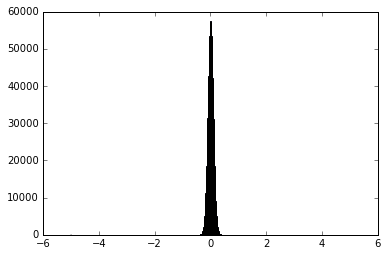

In [31]:
plt.hist(img_f, bins=1000, range=(-5,5))
plt.show()

In [43]:
vals = np.histogram(img_f, bins=1000, range=(-250,250))

In [48]:
vals[-1][:-1]

array([-250. , -249.5, -249. , -248.5, -248. , -247.5, -247. , -246.5,
       -246. , -245.5, -245. , -244.5, -244. , -243.5, -243. , -242.5,
       -242. , -241.5, -241. , -240.5, -240. , -239.5, -239. , -238.5,
       -238. , -237.5, -237. , -236.5, -236. , -235.5, -235. , -234.5,
       -234. , -233.5, -233. , -232.5, -232. , -231.5, -231. , -230.5,
       -230. , -229.5, -229. , -228.5, -228. , -227.5, -227. , -226.5,
       -226. , -225.5, -225. , -224.5, -224. , -223.5, -223. , -222.5,
       -222. , -221.5, -221. , -220.5, -220. , -219.5, -219. , -218.5,
       -218. , -217.5, -217. , -216.5, -216. , -215.5, -215. , -214.5,
       -214. , -213.5, -213. , -212.5, -212. , -211.5, -211. , -210.5,
       -210. , -209.5, -209. , -208.5, -208. , -207.5, -207. , -206.5,
       -206. , -205.5, -205. , -204.5, -204. , -203.5, -203. , -202.5,
       -202. , -201.5, -201. , -200.5, -200. , -199.5, -199. , -198.5,
       -198. , -197.5, -197. , -196.5, -196. , -195.5, -195. , -194.5,
      

In [38]:
import pickle

h_r = pickle.load( open( DATADIR+"/histogram_r.p", "rb" ) )
h_i = pickle.load( open( DATADIR+"/histogram_i.p", "rb" ) )
#h_g = pickle.load( open( DATADIR+"/histogram_g.p", "rb" ) )
h_z = pickle.load( open( DATADIR+"/histogram_z.p", "rb" ) )

In [39]:
hist = h_i[0]
edges = h_i[1]

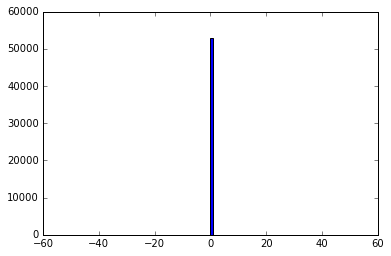

In [40]:
plt.bar(edges[:-1],hist,width=1)
plt.show()

In [25]:
edges[:-1]

array([-50. , -49.9, -49.8, -49.7, -49.6, -49.5, -49.4, -49.3, -49.2,
       -49.1, -49. , -48.9, -48.8, -48.7, -48.6, -48.5, -48.4, -48.3,
       -48.2, -48.1, -48. , -47.9, -47.8, -47.7, -47.6, -47.5, -47.4,
       -47.3, -47.2, -47.1, -47. , -46.9, -46.8, -46.7, -46.6, -46.5,
       -46.4, -46.3, -46.2, -46.1, -46. , -45.9, -45.8, -45.7, -45.6,
       -45.5, -45.4, -45.3, -45.2, -45.1, -45. , -44.9, -44.8, -44.7,
       -44.6, -44.5, -44.4, -44.3, -44.2, -44.1, -44. , -43.9, -43.8,
       -43.7, -43.6, -43.5, -43.4, -43.3, -43.2, -43.1, -43. , -42.9,
       -42.8, -42.7, -42.6, -42.5, -42.4, -42.3, -42.2, -42.1, -42. ,
       -41.9, -41.8, -41.7, -41.6, -41.5, -41.4, -41.3, -41.2, -41.1,
       -41. , -40.9, -40.8, -40.7, -40.6, -40.5, -40.4, -40.3, -40.2,
       -40.1, -40. , -39.9, -39.8, -39.7, -39.6, -39.5, -39.4, -39.3,
       -39.2, -39.1, -39. , -38.9, -38.8, -38.7, -38.6, -38.5, -38.4,
       -38.3, -38.2, -38.1, -38. , -37.9, -37.8, -37.7, -37.6, -37.5,
       -37.4, -37.3,

In [26]:
vals = []
for e, v in zip(edges, hist):
    vals += [e]*v
   
    

In [27]:
st=np.std(vals)

In [28]:
print st*20

12.105860528
